<a href="https://colab.research.google.com/github/DhanushN2005/Eye_state_classification_using_snowflake/blob/main/snowflake_connection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!pip install snowflake-connector-python

snowflake **connection**

In [111]:
import snowflake.connector
import pandas as pd
import numpy as np
conn=snowflake.connector.connect(
    user='dhanush',password='D#@nu$#0062005',
    account='TNDHGVI-JE49359',database='EYES',
    schema='PUBLIC',warehouse='COMPUTE_WH')

In [112]:
query='select * from "EYES"'
df=pd.read_sql(query,conn)
conn.close()
df.head()

/tmp/ipython-input-2707531382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,EYEDETECTION
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


algorithms-knn-randomforest, svm,decisiontree,navie bayis


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [114]:
from numpy.random import normal
from sklearn.preprocessing import Normalizer,StandardScaler
scaler=StandardScaler()
normalizer=Normalizer()

In [115]:
x=df.drop('EYEDETECTION',axis=1)
scaler.fit_transform(x)
normalizer.fit_transform(x)
y=df['EYEDETECTION']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [117]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
y_pred=model_knn.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score
ac_knn=accuracy_score(y_test,y_pred)
ac_knn

0.9689586114819759

navie bayis

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
x=df.drop('EYEDETECTION',axis=1)
normalizer.fit_transform(x)
#scaler.fit_transform(x)

y=df['EYEDETECTION']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [122]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [123]:
y_pred=model_nb.predict(x_test)
from sklearn.metrics import accuracy_score
ac_nb=accuracy_score(y_test,y_pred)
ac_nb

0.4679572763684913

logistic

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
x=df.drop('EYEDETECTION',axis=1)
normalizer.fit_transform(x)
scaler.fit_transform(x)

y=df['EYEDETECTION']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [126]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred=model_lr.predict(x_test)
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(y_test,y_pred)
ac_lr

0.6238317757009346

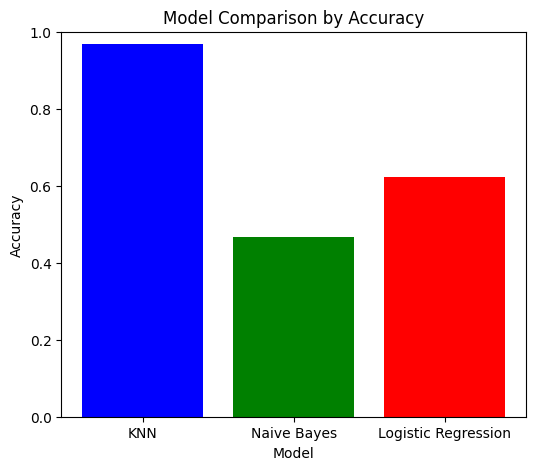

In [129]:
#model comparision chart
import matplotlib.pyplot as plt

model_names = ['KNN', 'Naive Bayes', 'Logistic Regression']
accuracy_scores = [
    ac_knn,
    ac_nb,
    ac_lr
]

plt.figure(figsize=(6, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison by Accuracy')
plt.ylim(0, 1)
plt.show()